In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/kgrat/OneDrive/Documents/ALY 6020/marketing_campaign.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.shape

(2240, 29)

In [6]:
data['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [7]:
data.isna().count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2240
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [8]:
print('sum of null values: {}'.format(data.isnull().sum()))

sum of null values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<AxesSubplot:xlabel='Education', ylabel='Income'>

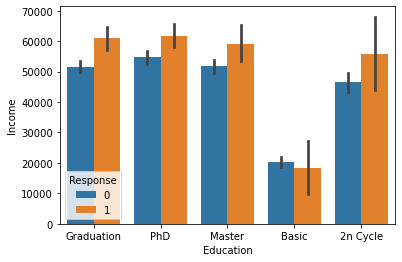

In [11]:
sns.barplot(x='Education',y='Income', data=data,
 hue='Response') 

In [12]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
data = data.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','Z_CostContact','Z_Revenue','Response','Dt_Customer'],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [16]:
y = data.pop('AcceptedCmp1')
data.insert(0,'AcceptedCmp1',y)

In [17]:
c= data.corr()
c

,AcceptedCmp1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
AcceptedCmp1,1.000000,-0.018219,-0.009611,0.276820,-0.174163,-0.144855,-0.021061,0.351417,0.191816,0.313076,0.261608,0.245102,0.170132,-0.127374,0.159292,0.309026,0.178743,-0.194773,-0.025594
ID,-0.018219,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,0.034154
Year_Birth,-0.009611,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,-0.030407
Income,0.276820,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.027225
Kidhome,-0.174163,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.040978
Teenhome,-0.144855,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,0.003307
Recency,-0.021061,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,0.013637
MntWines,0.351417,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,-0.039470
MntFruits,0.191816,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,-0.005324
MntMeatProducts,0.313076,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,-0.023782


In [18]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

<AxesSubplot:>

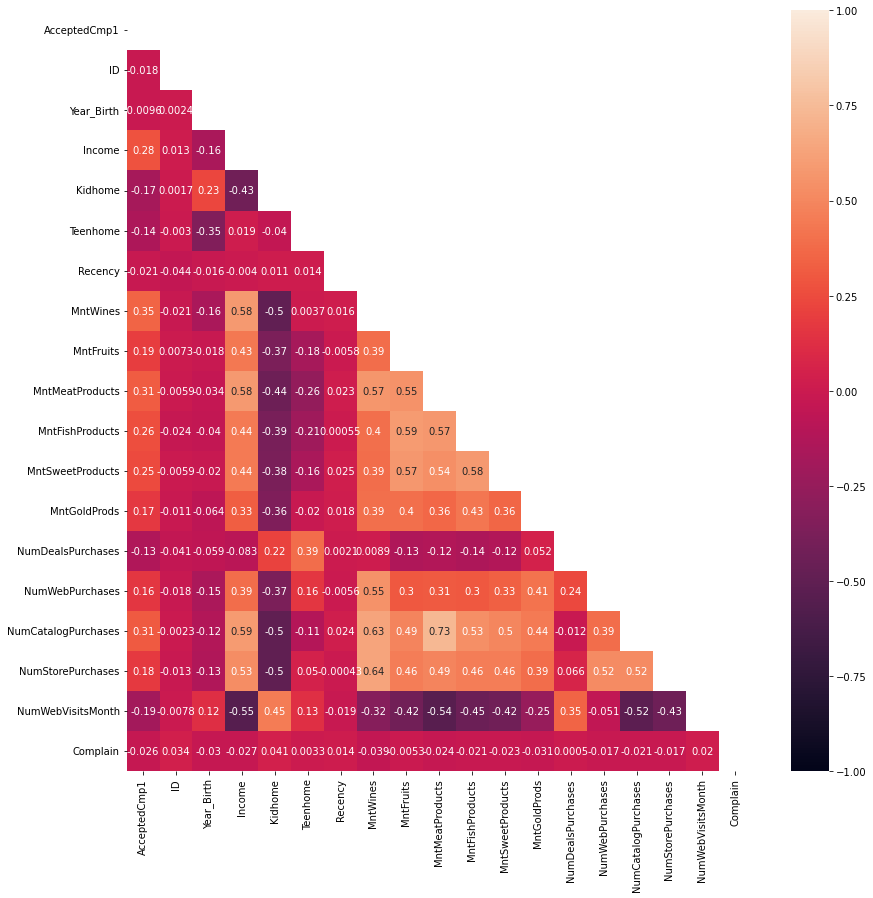

In [19]:
plt.figure(figsize=((14,14)))
sns.heatmap(c,annot=True, mask=mask, vmin=-1, vmax=1)

In [20]:
data

,AcceptedCmp1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0,5524,1957,Graduation,Single,58138.0,0,0,58,635,...,546,172,88,88,3,8,10,4,7,0
1,0,2174,1954,Graduation,Single,46344.0,1,1,38,11,...,6,2,1,6,2,1,1,2,5,0
2,0,4141,1965,Graduation,Together,71613.0,0,0,26,426,...,127,111,21,42,1,8,2,10,4,0
3,0,6182,1984,Graduation,Together,26646.0,1,0,26,11,...,20,10,3,5,2,2,0,4,6,0
4,0,5324,1981,PhD,Married,58293.0,1,0,94,173,...,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,10870,1967,Graduation,Married,61223.0,0,1,46,709,...,182,42,118,247,2,9,3,4,5,0
2236,1,4001,1946,PhD,Together,64014.0,2,1,56,406,...,30,0,0,8,7,8,2,5,7,0
2237,0,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,...,217,32,12,24,1,2,3,13,6,0
2238,0,8235,1956,Master,Together,69245.0,0,1,8,428,...,214,80,30,61,2,6,5,10,3,0


In [21]:
data =pd.get_dummies(data,columns=['Education','Marital_Status'])
y = data['AcceptedCmp1']
data = data.drop('AcceptedCmp1', axis= 1)

In [22]:
temp = pd.Series([variance_inflation_factor(data.values, i) for i in range (data.shape[1])], index = data.columns)
temp

ID                         1.011268
Year_Birth                 1.295672
Income                     2.220556
Kidhome                    1.887421
Teenhome                   1.602741
Recency                    1.012275
MntWines                   2.754338
MntFruits                  1.949743
MntMeatProducts            3.010643
MntFishProducts            2.132045
MntSweetProducts           1.932913
MntGoldProds               1.521131
NumDealsPurchases          1.647611
NumWebPurchases            1.973466
NumCatalogPurchases        3.031755
NumStorePurchases          2.346792
NumWebVisitsMonth          2.315855
Complain                   1.011969
Education_2n Cycle              inf
Education_Basic                 inf
Education_Graduation            inf
Education_Master                inf
Education_PhD                   inf
Marital_Status_Absurd           inf
Marital_Status_Alone            inf
Marital_Status_Divorced         inf
Marital_Status_Married          inf
Marital_Status_Single       

In [23]:
data = data.drop(['Education_Basic','Marital_Status_YOLO'], axis= 1)

In [24]:
temp = pd.Series([variance_inflation_factor(data.values, i) for i in range (data.shape[1])], index = data.columns)
temp

ID                            4.003655
Year_Birth                 1137.807492
Income                       11.780244
Kidhome                       3.107110
Teenhome                      2.744897
Recency                       3.914526
MntWines                      5.007327
MntFruits                     2.804515
MntMeatProducts               4.678104
MntFishProducts               3.135319
MntSweetProducts              2.768204
MntGoldProds                  2.616501
NumDealsPurchases             4.052040
NumWebPurchases               6.355395
NumCatalogPurchases           5.554708
NumStorePurchases             9.809042
NumWebVisitsMonth            13.437315
Complain                      1.018862
Education_2n Cycle            4.888888
Education_Graduation         23.013849
Education_Master              8.261020
Education_PhD                10.780404
Marital_Status_Absurd         2.008198
Marital_Status_Alone          2.461555
Marital_Status_Divorced     113.346831
Marital_Status_Married   

In [25]:
data = data.drop(['Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Year_Birth'],axis= 1)

In [26]:
temp = pd.Series([variance_inflation_factor(data.values, i) for i in range (data.shape[1])], index = data.columns)
temp

ID                        3.837697
Income                   11.002516
Kidhome                   3.047812
Teenhome                  2.723857
Recency                   3.718732
MntWines                  4.857052
MntFruits                 2.801418
MntMeatProducts           4.657892
MntFishProducts           3.123611
MntSweetProducts          2.764699
MntGoldProds              2.610410
NumDealsPurchases         3.997257
NumWebPurchases           6.309182
NumCatalogPurchases       5.486032
NumStorePurchases         9.200087
NumWebVisitsMonth         9.867977
Complain                  1.018131
Education_2n Cycle        2.955210
Education_Graduation     12.326119
Education_Master          4.553963
Education_PhD             5.968198
Marital_Status_Absurd     1.026234
Marital_Status_Alone      1.006515
Marital_Status_Widow      1.049168
dtype: float64

In [27]:
data = data.drop(['Education_Graduation','Income'],axis= 1)

In [28]:
temp = pd.Series([variance_inflation_factor(data.values, i) for i in range (data.shape[1])], index = data.columns)
temp

ID                       3.548758
Kidhome                  2.807970
Teenhome                 2.498570
Recency                  3.490769
MntWines                 4.677629
MntFruits                2.796194
MntMeatProducts          4.423723
MntFishProducts          3.113317
MntSweetProducts         2.754402
MntGoldProds             2.601807
NumDealsPurchases        3.869739
NumWebPurchases          6.234473
NumCatalogPurchases      5.278890
NumStorePurchases        7.876784
NumWebVisitsMonth        7.027582
Complain                 1.017854
Education_2n Cycle       1.176223
Education_Master         1.316136
Education_PhD            1.534571
Marital_Status_Absurd    1.025957
Marital_Status_Alone     1.005992
Marital_Status_Widow     1.048719
dtype: float64

In [29]:
data = data.drop (['NumStorePurchases','NumWebVisitsMonth','NumWebPurchases'],axis=1)

In [30]:
temp = pd.Series([variance_inflation_factor(data.values, i) for i in range (data.shape[1])], index = data.columns)
temp

ID                       3.028891
Kidhome                  2.314348
Teenhome                 2.397516
Recency                  3.101946
MntWines                 3.659979
MntFruits                2.733185
MntMeatProducts          4.361877
MntFishProducts          3.050545
MntSweetProducts         2.666060
MntGoldProds             2.486086
NumDealsPurchases        3.258967
NumCatalogPurchases      5.199723
Complain                 1.017225
Education_2n Cycle       1.156719
Education_Master         1.293784
Education_PhD            1.505667
Marital_Status_Absurd    1.023897
Marital_Status_Alone     1.005104
Marital_Status_Widow     1.048180
dtype: float64

In [31]:
x = data

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=123)


# Logistic Regresion

In [33]:
logistic_regression= LogisticRegression(solver= 'lbfgs',max_iter=2000)
model=logistic_regression.fit(x_train,y_train)


In [34]:
pred= model.predict(x_test)
print('Accuracy of the model is:{:.5f}'.format(model.score(x_test, y_test)))

Accuracy of the model is:0.95307


In [35]:
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Precision: 0.5555555555555556
Recall: 0.18518518518518517


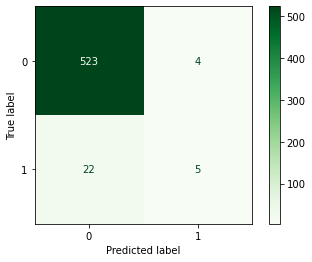

In [36]:
plot_confusion_matrix(logistic_regression,x_test, y_test,cmap='Greens')  
plt.show()

# Support Vector Machine

In [37]:
SVM = svm.SVC(kernel='linear')

In [38]:
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
svm_pred = SVM.predict(x_test)

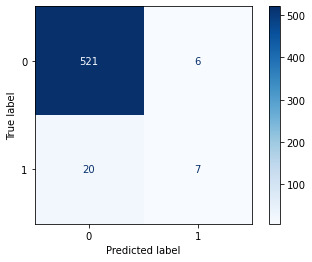

In [40]:
plot_confusion_matrix(SVM,x_test,y_test,cmap='Blues')

In [41]:
SVM.score(x_test, y_test)

0.9530685920577617

In [42]:
print("Precision:",metrics.precision_score(y_test,svm_pred))
print("Recall:",metrics.recall_score(y_test,svm_pred))

Precision: 0.5384615384615384
Recall: 0.25925925925925924
